In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


<function matplotlib.pyplot.show(close=None, block=None)>

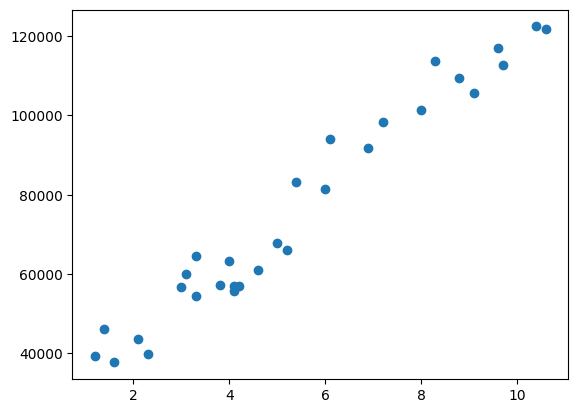

In [4]:
x = np.asanyarray(df[['YearsExperience']])
y = np.asanyarray(df[['Salary']])

plt.scatter(x, y)
plt.show

In [5]:
reg = LinearRegression().fit(x, y)

reg.score(x, y)

0.9569566641435086

In [6]:
# Prediction with sklearn
reg.predict(np.array([[3,]]))

array([[53198.09093089]])

In [7]:
# Start of my linear regression code

# initializing input(x) and output(y) values
X = df['YearsExperience'].values
Y = df['Salary'].values

# mean of input and output values
x_mean = np.mean(X)
y_mean = np.mean(Y)

# total number of values
n = len(X)

# b1 and b0 formula for calculation
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

# printing the coefficient
print(b1, b0)

9449.962321455077 24848.203966523193


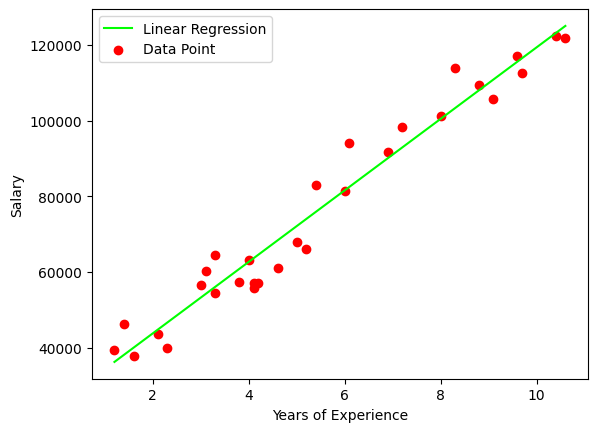

In [8]:
#plotting values 
x_max = np.max(X)
x_min = np.min(X)

#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Years of Experience')

#y-axis label
plt.ylabel('Salary')
plt.legend()
plt.show()

![](https://miro.medium.com/v2/resize:fit:654/format:webp/1*SGBsn7WytmYYbuTgDatIpw.gif)

In [9]:
# Root Mean Squared Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

5592.0436087606595


![](https://miro.medium.com/v2/resize:fit:636/format:webp/1*eebOVNcNlkwqM-fWjzmOLg.gif)

In [10]:
# R² score is accuracy of linear model, it goes 0 <= R² <= 1

sumofsquares = 0
sumofresiduals = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
    
score = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9569566641435086
